In [1]:
import pandas as pd
df2 = pd.read_csv('data/all_articles5-v2-publication_type.csv')
df2

,pmid,title,abstract,full_text,positive_labels
0,26530308,Erratum,"<S> lopez de lapuente a, pinto-medel mj, astob...","in the above-mentioned article, published in m...",['published_erratum']
1,28018390,Emerging Technologies for the Production of Re...,<S> plant cell walls are composed predominantl...,the demand for chemical energy is projected to...,['review']
2,27721798,Cardiac Troponin and Tropomyosin: Structural a...,<S> inherited myopathies affect both skeletal ...,cardiomyopathies represent a collection of dis...,['review']
3,34327328,Corrigendum: A Frequency-Domain Machine Learni...,NaN,results of a bivariate regression of oef0 agai...,['published_erratum']
4,35110838,Evolving Techniques in RSI: Can the Choice of ...,"<S> how to cite this article: george b, joachi...",NaN,['editorial']
...,...,...,...,...,...
71915,32130345,2020 Brazilian Thoracic Association recommenda...,<S> abstract\nthe pharmacological management o...,the pharmacological management of asthma has c...,['practice_guideline']
71916,35082458,Change is Inevitable Progress is Optional,<S> how to cite this article: peter j. change ...,the most important factor that determined the ...,['editorial']
71917,22932762,Novel Vectors of Malaria Parasite in the Weste...,<S> the main method of malaria control is base...,to the editor: the primary malaria control tec...,['letter']
71918,36677594,Natural Products for Cosmetic Applications,NaN,natural products provide an interesting and la...,['editorial']


In [2]:
df2 = df2.rename(columns={
            "full_text": "article",
            "abstract": "abstract"
        })
df2 = df2.dropna(subset=["article", "abstract"])
df2 = df2[df2["article"].str.strip().astype(bool)]
df2 = df2[df2["abstract"].str.strip().astype(bool)]
df2

,pmid,title,abstract,article,positive_labels
0,26530308,Erratum,"<S> lopez de lapuente a, pinto-medel mj, astob...","in the above-mentioned article, published in m...",['published_erratum']
1,28018390,Emerging Technologies for the Production of Re...,<S> plant cell walls are composed predominantl...,the demand for chemical energy is projected to...,['review']
2,27721798,Cardiac Troponin and Tropomyosin: Structural a...,<S> inherited myopathies affect both skeletal ...,cardiomyopathies represent a collection of dis...,['review']
5,36865013,Unmet needs in clinical trials in CKD: questio...,<S> abstract\nmany advances have been made in ...,data sharing is not applicable to this article...,['review']
6,35743947,Microbial Community Composition of the Antarct...,<S> antarctica represents a unique environment...,"before the mid-1980s, microbiological taxonomy...",['review']
...,...,...,...,...,...
71910,33980313,Patient engagement in fertility research: benc...,<S> background\npatient and public involvement...,patient and public involvement (ppi) in resear...,['letter']
71914,32400027,Immunological fortification at our barrier org...,<S> summary\n\nour barrier surfaces are fundam...,the barriers of the human body represent our f...,['editorial']
71915,32130345,2020 Brazilian Thoracic Association recommenda...,<S> abstract\nthe pharmacological management o...,the pharmacological management of asthma has c...,['practice_guideline']
71916,35082458,Change is Inevitable Progress is Optional,<S> how to cite this article: peter j. change ...,the most important factor that determined the ...,['editorial']


每個 label 出現的次數：
case_reports                              15128
review                                    10205
editorial                                  7899
letter                                     4652
comment                                    2450
historical_article                         2038
clinical_studies_as_topic                  1416
clinical_trials_as_topic                   1396
news                                       1219
congress                                    908
biography                                   821
practice_guidelines_as_topic                764
follow-up_studies                           468
clinical_study                              406
retrospective_studies                       395
predictive_value_of_tests                   358
clinical_trial                              330
practice_guideline                          296
portrait                                    281
interview                                   268
prospective_studies     

/tmp/ipykernel_898337/2063741188.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


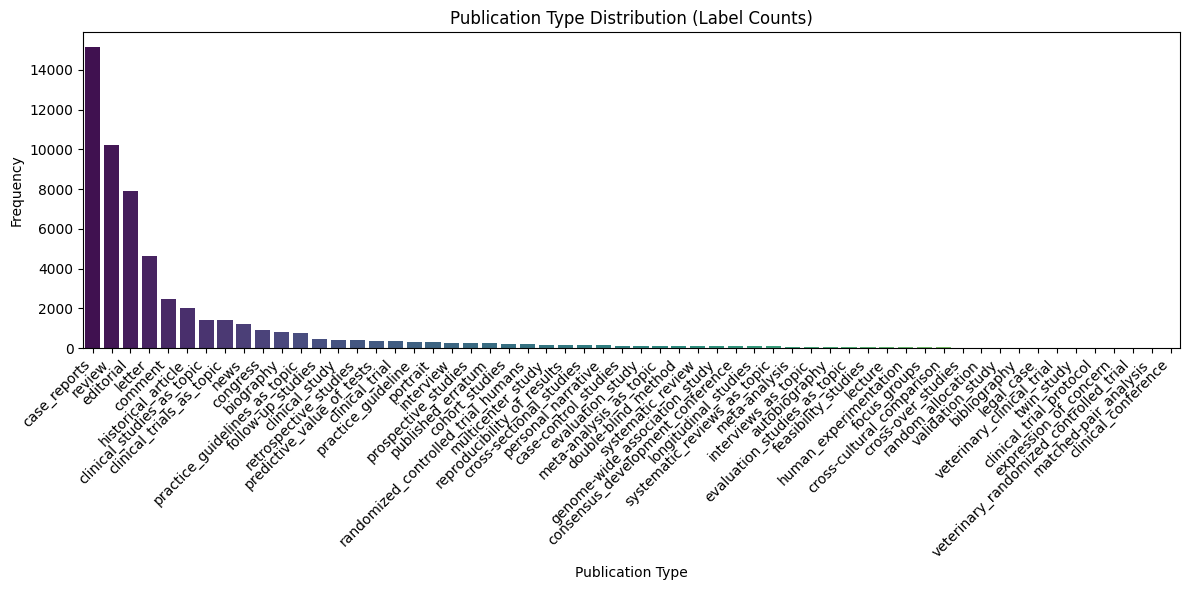


每篇文章標籤數量的統計：
num_labels
0      148
1    40321
2     3796
3     1541
4      376
5       97
6       27
7        3
Name: count, dtype: int64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

def safe_eval(val):
    if pd.isna(val):
        return []
    if isinstance(val, str):
        try:
            # 將字串 "['label']" 轉為列表 ['label']
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return []
    return val


merged_df = df2
merged_df['positive_labels'] = merged_df['positive_labels'].apply(safe_eval)



all_labels = []
for labels in merged_df['positive_labels']:
    if isinstance(labels, list):
        all_labels.extend(labels)
    elif isinstance(labels, str):
        try:
            import ast
            actual_list = ast.literal_eval(labels)
            all_labels.extend(actual_list)
        except:
            continue

label_counts = pd.Series(Counter(all_labels)).sort_values(ascending=False)

print("每個 label 出現的次數：")
print(label_counts)

if not label_counts.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
    plt.title("Publication Type Distribution (Label Counts)")
    plt.xlabel("Publication Type")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("警告：找不到任何標籤數據。")

merged_df['num_labels'] = merged_df['positive_labels'].apply(lambda x: len(x) if isinstance(x, list) else 0)
print("\n每篇文章標籤數量的統計：")
print(merged_df['num_labels'].value_counts().sort_index())

In [4]:
import pandas as pd
from scipy.spatial.distance import jensenshannon

# === 1. 讀入兩份 label count CSV 檔 ===
df1_counts = pd.read_csv("data/label_counts_b.csv", index_col=0).iloc[:, 0]
df2_counts = label_counts #pd.read_csv("data/label_counts_c-1.csv", index_col=0).iloc[:, 0]

# === 2. 整合所有可能出現的 label，補 0 ===
all_labels = sorted(set(df1_counts.index).union(df2_counts.index))
df1_counts = df1_counts.reindex(all_labels, fill_value=0)
df2_counts = df2_counts.reindex(all_labels, fill_value=0)

# === 3. 移除兩邊都為 0 的 label ===
sum_counts = df1_counts + df2_counts
non_zero_labels = sum_counts[sum_counts > 0].index
df1_counts = df1_counts[non_zero_labels]
df2_counts = df2_counts[non_zero_labels]

# === 4. 正規化成機率分佈 ===
p1 = df1_counts / df1_counts.sum()
p2 = df2_counts / df2_counts.sum()

# === 5. 計算 Jensen-Shannon Divergence ===
jsd = jensenshannon(p1, p2, base=2)  # base=2 → 結果會落在 [0,1] 範圍內

print(f"Jensen-Shannon Divergence = {jsd:.4f}")


Jensen-Shannon Divergence = 0.3804


Jensen-Shannon Divergence = 0.3804


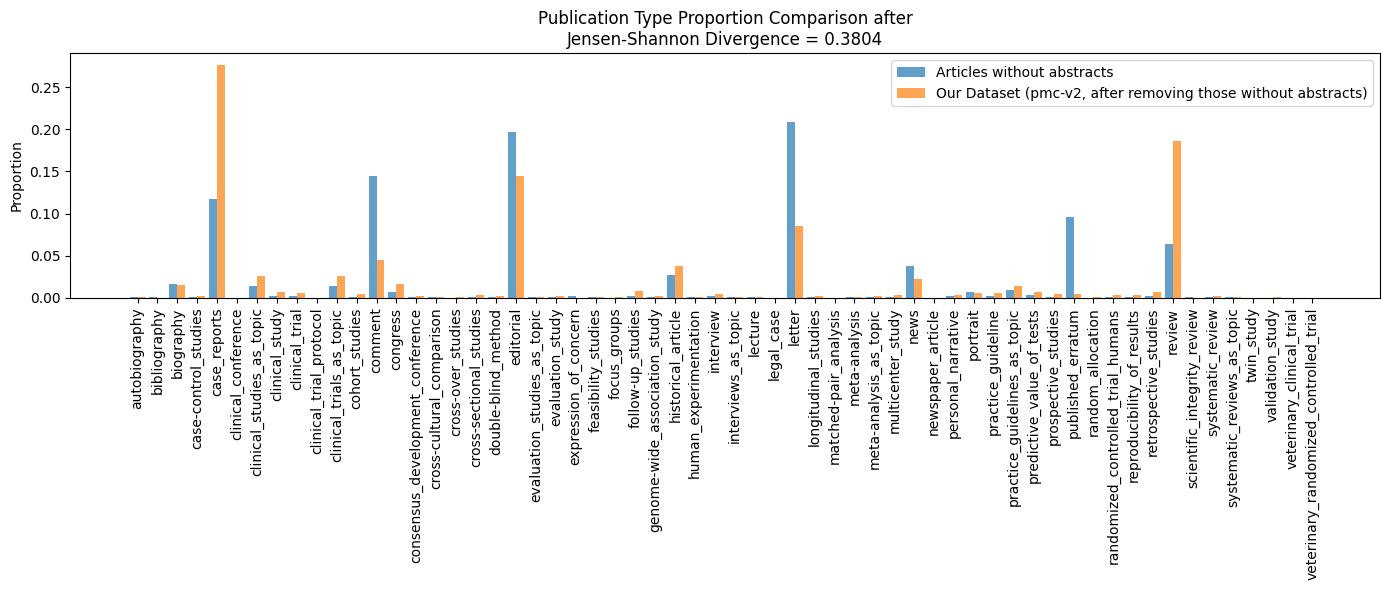

In [5]:
import pandas as pd
from scipy.spatial.distance import jensenshannon
import matplotlib.pyplot as plt

# === 檔案路徑（請自行修改為你的檔名） ===
file1 = "data/label_counts_b.csv"
# file2 = "data/label_counts_c-1.csv"

# === 1. 讀入 label count ===
df1_counts = pd.read_csv(file1, index_col=0).iloc[:, 0]
df2_counts = label_counts #pd.read_csv(file2, index_col=0).iloc[:, 0]

# === 2. 整合 label，補 0，移除全為 0 的 ===
all_labels = sorted(set(df1_counts.index).union(df2_counts.index))
df1_counts = df1_counts.reindex(all_labels, fill_value=0)
df2_counts = df2_counts.reindex(all_labels, fill_value=0)

sum_counts = df1_counts + df2_counts
non_zero_labels = sum_counts[sum_counts > 0].index
df1_counts = df1_counts[non_zero_labels]
df2_counts = df2_counts[non_zero_labels]

# === 3. 正規化為機率分布 ===
p1 = df1_counts / df1_counts.sum()
p2 = df2_counts / df2_counts.sum()

# === 4. 計算 Jensen-Shannon Divergence ===
jsd = jensenshannon(p1, p2, base=2)
print(f"Jensen-Shannon Divergence = {jsd:.4f}")

# === 5. 畫出 Bar Chart 比較分布 ===
fig, ax = plt.subplots(figsize=(14, 6))
x = range(len(non_zero_labels))
bar_width = 0.4

ax.bar([i - bar_width/2 for i in x], p1, width=bar_width, label='Articles without abstracts', alpha=0.7)
ax.bar([i + bar_width/2 for i in x], p2, width=bar_width, label='Our Dataset (pmc-v2, after removing those without abstracts)', alpha=0.7)

ax.set_xticks(x)
ax.set_xticklabels(non_zero_labels, rotation=90)
ax.set_ylabel('Proportion')
ax.set_title(f'Publication Type Proportion Comparison after\nJensen-Shannon Divergence = {jsd:.4f}')
ax.legend()

plt.tight_layout()
plt.show()


## rest

In [2]:
df2 = df2.rename(columns={
    "full_text": "article",
    "abstract": "abstract"
})
df2 = df2.dropna(subset=["article", "abstract"])
df2 = df2[df2["article"].str.strip().astype(bool)]
df2 = df2[df2["abstract"].str.strip().astype(bool)]
df2

,pmid,title,abstract,article,positive_labels
0,26530308,Erratum,"<S> lopez de lapuente a, pinto-medel mj, astob...","in the above-mentioned article, published in m...",['published_erratum']
1,28018390,Emerging Technologies for the Production of Re...,<S> plant cell walls are composed predominantl...,the demand for chemical energy is projected to...,['review']
2,27721798,Cardiac Troponin and Tropomyosin: Structural a...,<S> inherited myopathies affect both skeletal ...,cardiomyopathies represent a collection of dis...,['review']
5,36865013,Unmet needs in clinical trials in CKD: questio...,<S> abstract\nmany advances have been made in ...,data sharing is not applicable to this article...,['review']
6,35743947,Microbial Community Composition of the Antarct...,<S> antarctica represents a unique environment...,"before the mid-1980s, microbiological taxonomy...",['review']
...,...,...,...,...,...
71910,33980313,Patient engagement in fertility research: benc...,<S> background\npatient and public involvement...,patient and public involvement (ppi) in resear...,['letter']
71914,32400027,Immunological fortification at our barrier org...,<S> summary\n\nour barrier surfaces are fundam...,the barriers of the human body represent our f...,['editorial']
71915,32130345,2020 Brazilian Thoracic Association recommenda...,<S> abstract\nthe pharmacological management o...,the pharmacological management of asthma has c...,['practice_guideline']
71916,35082458,Change is Inevitable Progress is Optional,<S> how to cite this article: peter j. change ...,the most important factor that determined the ...,['editorial']


In [ ]:
# import pandas as pd
# import requests
# import xml.etree.ElementTree as ET
# from time import sleep
# from tqdm import tqdm  # ✅ 加入 tqdm 進度條

# # API 基本設定
# API_URL = "https://www.ncbi.nlm.nih.gov/pmc/utils/idconv/v1.0/"  # 實際 endpoint
# TOOL = "fulltext_labeling"  # 替換成你的 tool 名稱
# EMAIL = "yuhsinl2@illinois.edu"  # 替換成你的 email

# # 轉為字串清單
# all_ids = df2['article_id'].astype(str).tolist()

# # 記錄 id 對應的 pmcid
# id_to_pmcid = {}

# # 分批處理，每批最多 200 個
# batch_size = 200
# for i in tqdm(range(0, len(all_ids), batch_size), desc="Processing batches"):
    
#     batch_ids = all_ids[i:i + batch_size]
#     ids_param = ",".join(batch_ids)

#     params = {
#         "tool": TOOL,
#         "email": EMAIL,
#         "ids": ids_param
#     }

#     response = requests.get(API_URL, params=params)

#     if response.status_code == 200:
#         root = ET.fromstring(response.text)
#         for record in root.findall(".//record"):
#             requested_id = record.get("requested-id")
#             pmid = record.get("pmid")
#             id_to_pmcid[requested_id] = pmid
#     else:
#         print(f"Error on batch {i // batch_size + 1}: {response.status_code}")

#     # 避免 API rate limit
#     sleep(1)

# # 新增 PMCID 欄位

# df2['PMID'] = df2['article_id'].map(id_to_pmcid)

# # 儲存結果
# df2.to_csv('data/Without_abstract_balance_with_pmcid.csv', index=False)
# df2


,article_id,pmid,title,abstract,full_text,section_names,sections,missing_fields
0,PMC314107,21811635,Adipose Tissue Fatty Acid Patterns and Changes...,<S> introduction\ndiets rich in n-3 long chain...,diets rich in n-3 long chain polyunsaturated f...,"['Introduction', 'Methods', 'Results', 'Conclu...",['diets rich in n-3 long chain polyunsaturated...,[]
1,PMC539139,28382799,Elevated plasma fibrinogen levels and prognosi...,<S> objective\nto evaluate the effect of eleva...,to evaluate the effect of elevated plasma fibr...,"['Objective', 'Methods', 'Results', 'Conclusio...",['to evaluate the effect of elevated plasma fi...,[]
2,PMC878323,35110838,Evolving Techniques in RSI: Can the Choice of ...,"<S> how to cite this article: george b, joachi...",NaN,['O'],[''],[]
3,PMC464164,26560140,Potential Cost-Effectiveness of Prenatal Distr...,<S> background\nin settings where home birth r...,"in settings where home birth rates are high, p...","['Background', 'Methods and Findings', 'Conclu...","['in settings where home birth rates are high,...",[]
4,PMC313553,21699730,Developing cessation interventions for the soc...,<S> social and community service organisations...,social and community service organisations (sc...,"['Background', 'Methods', 'Results', 'Conclusi...",['social and community service organisations (...,[]
...,...,...,...,...,...,...,...,...
109051,PMC292750,20687938,Validation study of a web-based assessment of ...,<S> background\ngood clinical care of prostate...,good clinical care of prostate cancer patients...,"['Background', 'Methods', 'Results', 'Conclusi...",['good clinical care of prostate cancer patien...,[]
109052,PMC875428,35082458,Change is Inevitable Progress is Optional,<S> how to cite this article: peter j. change ...,the most important factor that determined the ...,"['T', 'B', 'D']",['the most important factor that determined th...,[]
109053,PMC685779,30862961,Differences in Patient Characteristics and Car...,<S> background:\nthe induced hypothermia (ih) ...,the induced hypothermia (ih) and optimizing co...,"['Background:', 'Methods:', 'Results:', 'Concl...",['the induced hypothermia (ih) and optimizing ...,[]
109054,PMC986711,36677594,Natural Products for Cosmetic Applications,NaN,natural products provide an interesting and la...,['Body'],['natural products provide an interesting and ...,['abstract']


In [2]:
# import pandas as pd
# df2 = pd.read_csv('data/Without_abstract_balance_with_pmcid.csv')
df2

,article_id,pmid,title,abstract,full_text,section_names,sections,missing_fields
0,PMC314107,21811635,Adipose Tissue Fatty Acid Patterns and Changes...,<S> introduction\ndiets rich in n-3 long chain...,diets rich in n-3 long chain polyunsaturated f...,"['Introduction', 'Methods', 'Results', 'Conclu...",['diets rich in n-3 long chain polyunsaturated...,[]
1,PMC539139,28382799,Elevated plasma fibrinogen levels and prognosi...,<S> objective\nto evaluate the effect of eleva...,to evaluate the effect of elevated plasma fibr...,"['Objective', 'Methods', 'Results', 'Conclusio...",['to evaluate the effect of elevated plasma fi...,[]
2,PMC878323,35110838,Evolving Techniques in RSI: Can the Choice of ...,"<S> how to cite this article: george b, joachi...",NaN,['O'],[''],[]
3,PMC464164,26560140,Potential Cost-Effectiveness of Prenatal Distr...,<S> background\nin settings where home birth r...,"in settings where home birth rates are high, p...","['Background', 'Methods and Findings', 'Conclu...","['in settings where home birth rates are high,...",[]
4,PMC313553,21699730,Developing cessation interventions for the soc...,<S> social and community service organisations...,social and community service organisations (sc...,"['Background', 'Methods', 'Results', 'Conclusi...",['social and community service organisations (...,[]
...,...,...,...,...,...,...,...,...
109051,PMC292750,20687938,Validation study of a web-based assessment of ...,<S> background\ngood clinical care of prostate...,good clinical care of prostate cancer patients...,"['Background', 'Methods', 'Results', 'Conclusi...",['good clinical care of prostate cancer patien...,[]
109052,PMC875428,35082458,Change is Inevitable Progress is Optional,<S> how to cite this article: peter j. change ...,the most important factor that determined the ...,"['T', 'B', 'D']",['the most important factor that determined th...,[]
109053,PMC685779,30862961,Differences in Patient Characteristics and Car...,<S> background:\nthe induced hypothermia (ih) ...,the induced hypothermia (ih) and optimizing co...,"['Background:', 'Methods:', 'Results:', 'Concl...",['the induced hypothermia (ih) and optimizing ...,[]
109054,PMC986711,36677594,Natural Products for Cosmetic Applications,NaN,natural products provide an interesting and la...,['Body'],['natural products provide an interesting and ...,['abstract']


In [3]:
df2 = df2.dropna(subset=['pmid'])
df2['pmid'] = df2['pmid'].astype(int)


In [4]:
df2

,article_id,pmid,title,abstract,full_text,section_names,sections,missing_fields
0,PMC314107,21811635,Adipose Tissue Fatty Acid Patterns and Changes...,<S> introduction\ndiets rich in n-3 long chain...,diets rich in n-3 long chain polyunsaturated f...,"['Introduction', 'Methods', 'Results', 'Conclu...",['diets rich in n-3 long chain polyunsaturated...,[]
1,PMC539139,28382799,Elevated plasma fibrinogen levels and prognosi...,<S> objective\nto evaluate the effect of eleva...,to evaluate the effect of elevated plasma fibr...,"['Objective', 'Methods', 'Results', 'Conclusio...",['to evaluate the effect of elevated plasma fi...,[]
2,PMC878323,35110838,Evolving Techniques in RSI: Can the Choice of ...,"<S> how to cite this article: george b, joachi...",NaN,['O'],[''],[]
3,PMC464164,26560140,Potential Cost-Effectiveness of Prenatal Distr...,<S> background\nin settings where home birth r...,"in settings where home birth rates are high, p...","['Background', 'Methods and Findings', 'Conclu...","['in settings where home birth rates are high,...",[]
4,PMC313553,21699730,Developing cessation interventions for the soc...,<S> social and community service organisations...,social and community service organisations (sc...,"['Background', 'Methods', 'Results', 'Conclusi...",['social and community service organisations (...,[]
...,...,...,...,...,...,...,...,...
109051,PMC292750,20687938,Validation study of a web-based assessment of ...,<S> background\ngood clinical care of prostate...,good clinical care of prostate cancer patients...,"['Background', 'Methods', 'Results', 'Conclusi...",['good clinical care of prostate cancer patien...,[]
109052,PMC875428,35082458,Change is Inevitable Progress is Optional,<S> how to cite this article: peter j. change ...,the most important factor that determined the ...,"['T', 'B', 'D']",['the most important factor that determined th...,[]
109053,PMC685779,30862961,Differences in Patient Characteristics and Car...,<S> background:\nthe induced hypothermia (ih) ...,the induced hypothermia (ih) and optimizing co...,"['Background:', 'Methods:', 'Results:', 'Concl...",['the induced hypothermia (ih) and optimizing ...,[]
109054,PMC986711,36677594,Natural Products for Cosmetic Applications,NaN,natural products provide an interesting and la...,['Body'],['natural products provide an interesting and ...,['abstract']


In [4]:
import pandas as pd

df = pd.read_csv('data/binary_data.csv')
# df = df[2800000:4200000]

: 

In [6]:
df

,ids,autobiography,bibliography,biography,case-control_studies,case_reports,clinical_conference,clinical_studies_as_topic,clinical_study,clinical_trial,...,retraction_of_publication,retrospective_studies,review,scientific_integrity_review,systematic_review,systematic_reviews_as_topic,twin_study,validation_study,veterinary_clinical_trial,veterinary_randomized_controlled_trial
0,9868216,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
1,9358420,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
2,10553438,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
3,31785634,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,28538805,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572361,9474670,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9572362,23685058,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9572363,18985570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9572364,15682490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
merged_df = pd.merge(df2, df, how='inner', left_on='pmid', right_on='ids')
merged_df

,article_id,pmid,title,abstract,full_text,section_names,sections,missing_fields,ids,autobiography,...,retraction_of_publication,retrospective_studies,review,scientific_integrity_review,systematic_review,systematic_reviews_as_topic,twin_study,validation_study,veterinary_clinical_trial,veterinary_randomized_controlled_trial
0,PMC314107,21811635,Adipose Tissue Fatty Acid Patterns and Changes...,<S> introduction\ndiets rich in n-3 long chain...,diets rich in n-3 long chain polyunsaturated f...,"['Introduction', 'Methods', 'Results', 'Conclu...",['diets rich in n-3 long chain polyunsaturated...,[],21811635,0,...,0,0,0,0,0,0,0,0,0,0
1,PMC539139,28382799,Elevated plasma fibrinogen levels and prognosi...,<S> objective\nto evaluate the effect of eleva...,to evaluate the effect of elevated plasma fibr...,"['Objective', 'Methods', 'Results', 'Conclusio...",['to evaluate the effect of elevated plasma fi...,[],28382799,0,...,0,0,0,0,0,0,0,0,0,0
2,PMC878323,35110838,Evolving Techniques in RSI: Can the Choice of ...,"<S> how to cite this article: george b, joachi...",NaN,['O'],[''],[],35110838,0,...,0,0,0,0,0,0,0,0,0,0
3,PMC464164,26560140,Potential Cost-Effectiveness of Prenatal Distr...,<S> background\nin settings where home birth r...,"in settings where home birth rates are high, p...","['Background', 'Methods and Findings', 'Conclu...","['in settings where home birth rates are high,...",[],26560140,0,...,0,0,0,0,0,0,0,0,0,0
4,PMC313553,21699730,Developing cessation interventions for the soc...,<S> social and community service organisations...,social and community service organisations (sc...,"['Background', 'Methods', 'Results', 'Conclusi...",['social and community service organisations (...,[],21699730,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109051,PMC292750,20687938,Validation study of a web-based assessment of ...,<S> background\ngood clinical care of prostate...,good clinical care of prostate cancer patients...,"['Background', 'Methods', 'Results', 'Conclusi...",['good clinical care of prostate cancer patien...,[],20687938,0,...,0,0,0,0,0,0,0,1,0,0
109052,PMC875428,35082458,Change is Inevitable Progress is Optional,<S> how to cite this article: peter j. change ...,the most important factor that determined the ...,"['T', 'B', 'D']",['the most important factor that determined th...,[],35082458,0,...,0,0,0,0,0,0,0,0,0,0
109053,PMC685779,30862961,Differences in Patient Characteristics and Car...,<S> background:\nthe induced hypothermia (ih) ...,the induced hypothermia (ih) and optimizing co...,"['Background:', 'Methods:', 'Results:', 'Concl...",['the induced hypothermia (ih) and optimizing ...,[],30862961,0,...,0,0,0,0,0,0,0,0,0,0
109054,PMC986711,36677594,Natural Products for Cosmetic Applications,NaN,natural products provide an interesting and la...,['Body'],['natural products provide an interesting and ...,['abstract'],36677594,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
merged_df.to_csv('data/merged_df_without_abstract_balanced.csv', index=False)

In [1]:
import pandas as pd
merged_df = pd.read_csv('data/merged_df_without_abstract_balanced.csv')
merged_df

,article_id,pmid,title,abstract,full_text,section_names,sections,missing_fields,ids,autobiography,...,retraction_of_publication,retrospective_studies,review,scientific_integrity_review,systematic_review,systematic_reviews_as_topic,twin_study,validation_study,veterinary_clinical_trial,veterinary_randomized_controlled_trial
0,PMC314107,21811635,Adipose Tissue Fatty Acid Patterns and Changes...,<S> introduction\ndiets rich in n-3 long chain...,diets rich in n-3 long chain polyunsaturated f...,"['Introduction', 'Methods', 'Results', 'Conclu...",['diets rich in n-3 long chain polyunsaturated...,[],21811635,0,...,0,0,0,0,0,0,0,0,0,0
1,PMC539139,28382799,Elevated plasma fibrinogen levels and prognosi...,<S> objective\nto evaluate the effect of eleva...,to evaluate the effect of elevated plasma fibr...,"['Objective', 'Methods', 'Results', 'Conclusio...",['to evaluate the effect of elevated plasma fi...,[],28382799,0,...,0,0,0,0,0,0,0,0,0,0
2,PMC878323,35110838,Evolving Techniques in RSI: Can the Choice of ...,"<S> how to cite this article: george b, joachi...",NaN,['O'],[''],[],35110838,0,...,0,0,0,0,0,0,0,0,0,0
3,PMC464164,26560140,Potential Cost-Effectiveness of Prenatal Distr...,<S> background\nin settings where home birth r...,"in settings where home birth rates are high, p...","['Background', 'Methods and Findings', 'Conclu...","['in settings where home birth rates are high,...",[],26560140,0,...,0,0,0,0,0,0,0,0,0,0
4,PMC313553,21699730,Developing cessation interventions for the soc...,<S> social and community service organisations...,social and community service organisations (sc...,"['Background', 'Methods', 'Results', 'Conclusi...",['social and community service organisations (...,[],21699730,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109051,PMC292750,20687938,Validation study of a web-based assessment of ...,<S> background\ngood clinical care of prostate...,good clinical care of prostate cancer patients...,"['Background', 'Methods', 'Results', 'Conclusi...",['good clinical care of prostate cancer patien...,[],20687938,0,...,0,0,0,0,0,0,0,1,0,0
109052,PMC875428,35082458,Change is Inevitable Progress is Optional,<S> how to cite this article: peter j. change ...,the most important factor that determined the ...,"['T', 'B', 'D']",['the most important factor that determined th...,[],35082458,0,...,0,0,0,0,0,0,0,0,0,0
109053,PMC685779,30862961,Differences in Patient Characteristics and Car...,<S> background:\nthe induced hypothermia (ih) ...,the induced hypothermia (ih) and optimizing co...,"['Background:', 'Methods:', 'Results:', 'Concl...",['the induced hypothermia (ih) and optimizing ...,[],30862961,0,...,0,0,0,0,0,0,0,0,0,0
109054,PMC986711,36677594,Natural Products for Cosmetic Applications,NaN,natural products provide an interesting and la...,['Body'],['natural products provide an interesting and ...,['abstract'],36677594,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
supplement = pd.read_csv('data/supplement_ids.csv')
merged_df = merged_df[~merged_df['article_id'].isin(supplement['ids'])]

In [3]:
merged_df

,article_id,pmid,title,abstract,full_text,section_names,sections,missing_fields,ids,autobiography,...,retraction_of_publication,retrospective_studies,review,scientific_integrity_review,systematic_review,systematic_reviews_as_topic,twin_study,validation_study,veterinary_clinical_trial,veterinary_randomized_controlled_trial
0,PMC314107,21811635,Adipose Tissue Fatty Acid Patterns and Changes...,<S> introduction\ndiets rich in n-3 long chain...,diets rich in n-3 long chain polyunsaturated f...,"['Introduction', 'Methods', 'Results', 'Conclu...",['diets rich in n-3 long chain polyunsaturated...,[],21811635,0,...,0,0,0,0,0,0,0,0,0,0
1,PMC539139,28382799,Elevated plasma fibrinogen levels and prognosi...,<S> objective\nto evaluate the effect of eleva...,to evaluate the effect of elevated plasma fibr...,"['Objective', 'Methods', 'Results', 'Conclusio...",['to evaluate the effect of elevated plasma fi...,[],28382799,0,...,0,0,0,0,0,0,0,0,0,0
3,PMC464164,26560140,Potential Cost-Effectiveness of Prenatal Distr...,<S> background\nin settings where home birth r...,"in settings where home birth rates are high, p...","['Background', 'Methods and Findings', 'Conclu...","['in settings where home birth rates are high,...",[],26560140,0,...,0,0,0,0,0,0,0,0,0,0
4,PMC313553,21699730,Developing cessation interventions for the soc...,<S> social and community service organisations...,social and community service organisations (sc...,"['Background', 'Methods', 'Results', 'Conclusi...",['social and community service organisations (...,[],21699730,0,...,0,0,0,0,0,0,0,0,0,0
5,PMC550045,28729970,Severe cyclophosphamide-related hyponatremia i...,<S> cyclophosphamide is frequently used to tre...,hyponatremia is the most frequent electrolyte ...,"['INTRODUCTION', 'CASE REPORT', 'DISCUSSION', ...",['hyponatremia is the most frequent electrolyt...,[],28729970,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109049,PMC237638,12671696,Oral mucositis and selective elimination of or...,<S> mucositis is an acute inflammation of the ...,patients with a malignant tumour in the head a...,"['PATIENTS AND METHODS', 'Protocol', 'Assignme...",['patients with a malignant tumour in the head...,[],12671696,0,...,0,0,0,0,0,0,0,0,0,0
109050,PMC738126,32765333,"Relationship Between Debt and Depression, Anxi...",<S> background: this article aims to review re...,the term debt can be understood in two differe...,"['Introduction', 'Methods', 'Systematic Review...","[""the term debt can be understood in two diffe...",[],32765333,0,...,0,0,1,0,1,0,0,0,0,0
109051,PMC292750,20687938,Validation study of a web-based assessment of ...,<S> background\ngood clinical care of prostate...,good clinical care of prostate cancer patients...,"['Background', 'Methods', 'Results', 'Conclusi...",['good clinical care of prostate cancer patien...,[],20687938,0,...,0,0,0,0,0,0,0,1,0,0
109053,PMC685779,30862961,Differences in Patient Characteristics and Car...,<S> background:\nthe induced hypothermia (ih) ...,the induced hypothermia (ih) and optimizing co...,"['Background:', 'Methods:', 'Results:', 'Concl...",['the induced hypothermia (ih) and optimizing ...,[],30862961,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# merged_df = merged_df.drop(columns=['dcom'])

In [12]:
import requests
import re
import pandas as pd
from tqdm import tqdm

def fetch_dcom_bulk(pmids, chunk_size=200):
    """
    接收一個含 PubMed ID 的串列，將它們分批（每批最多 chunk_size 筆）呼叫 API。
    回傳一個 dict：{ pmid字串: dcom字串或None }
    """
    results = {}

    # 將所有pmids分塊，最多每塊200筆
    for i in tqdm(range(0, len(pmids), chunk_size)):
        chunk = pmids[i:i + chunk_size]
        # 用逗號把所有pmid串起來
        chunk_str = ",".join(str(p) for p in chunk)

        # 準備 API URL
        url = (
            "https://api.ncbi.nlm.nih.gov/lit/ctxp/v1/pubmed/"
            f"?format=medline&id={chunk_str}"
        )
        
        # 呼叫 API
        resp = requests.get(url, timeout=10)
        resp.raise_for_status()
        text = resp.text.strip()
        
        # 解析取得的 MEDLINE 文字：
        # 一般可用空行(\n\n)來分割不同文獻
        records = re.split(r'\n\s*\n', text)
        
        for record in records:
            # 擷取 PMID
            pmid_match = re.search(r"^PMID\s*-\s*(\d+)", record, re.MULTILINE)
            # 擷取 DCOM
            dcom_match = re.search(r"^DP\s*-\s*(\S+)", record, re.MULTILINE)
            
            if pmid_match:
                pmid_val = pmid_match.group(1)
                # 若沒找到 DCOM，則是 None
                dcom_val = dcom_match.group(1) if dcom_match else None
                results[pmid_val] = dcom_val
    
    return results

# === 使用範例 ===

# 假設這是你的 DataFrame，裡面有一欄 'ids' 放了 PMID
# df = pd.DataFrame({'ids': [9868216, 28377901, 10553438, ...]})

# 先整理出所有 PMID 的列表
pmid_list = merged_df['ids'].tolist()

# 一次向 API 批次抓取，回傳一個字典 { '9868216': '19991213', ... }
dcom_dict = fetch_dcom_bulk(pmid_list, chunk_size=200)

# 將結果回填到 DataFrame 的新欄位 'dcom'
# 注意：dcom_dict 的 key、df['ids'] 都要同樣類型才對得上
# 若 df['ids'] 是int，則可先轉成 str 來比對
merged_df['dp'] = merged_df['ids'].astype(str).map(dcom_dict)




100%|██████████| 20/20 [00:15<00:00,  1.27it/s]


In [13]:
merged_df

,article_id,title,abstract,full_text,section_names,sections,missing_fields,PMID,ids,autobiography,...,retrospective_studies,review,scientific_integrity_review,systematic_review,systematic_reviews_as_topic,twin_study,validation_study,veterinary_clinical_trial,veterinary_randomized_controlled_trial,dp
0,PMC314107,Adipose Tissue Fatty Acid Patterns and Changes...,<S> introduction\ndiets rich in n-3 long chain...,diets rich in n-3 long chain polyunsaturated f...,"['Introduction', 'Methods', 'Results', 'Conclu...",['diets rich in n-3 long chain polyunsaturated...,[],14762467,14762467,0,...,0,1,0,0,0,0,0,0,0,2004
1,PMC327104,Adherence to,<S> background\npatients' adherence to malaria...,patients' adherence to malaria treatment is an...,"['Background', 'Methods', 'Results', 'Conclusi...","[""patients' adherence to malaria treatment is ...",[],14762065,14762065,0,...,0,0,0,0,0,0,1,0,0,2004
2,PMC199561,Genome-wide association with diabetes-related ...,<S> background\nsusceptibility to type 2 diabe...,susceptibility to type 2 diabetes may be confe...,"['Background', 'Methods', 'Results', 'Conclusi...",['susceptibility to type 2 diabetes may be con...,[],11306595,11306595,0,...,0,1,0,0,0,0,0,0,0,2001
3,PMC268101,Effect of Drinking on Adiponectin in Healthy M...,<S> objective\nmoderate alcohol consumption is...,moderate alcohol consumption is associated wit...,"['OBJECTIVE', 'RESEARCH DESIGN AND METHODS', '...",['moderate alcohol consumption is associated w...,[],1977764,1977764,0,...,0,0,0,0,0,0,0,0,0,1990
4,PMC395819,Expression of enterovirus 71 capsid protein VP...,<S> the vpl gene of enterovirus 71 (ev71) was ...,ev71 is one of the most important pathogens in...,"['Introduction', 'Materials and Methods', 'Spe...",['ev71 is one of the most important pathogens ...,[],15111479,15111479,0,...,0,1,0,0,0,0,0,0,0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815,PMC161895,"Elevated Circulating IL-1β and TNF-Alpha, and ...",<S> the purpose of the present study was to ex...,spontaneous abortion is the loss of an intraut...,"['INTRODUCTION', 'MATERIAL AND METHODS', 'Stud...","[""spontaneous abortion is the loss of an intra...",[],12809251,12809251,0,...,1,0,0,0,0,0,0,0,0,2003
3816,PMC495068,Long-term prognosis of unrecognized myocardial...,<S> background\nindividuals with unrecognized ...,individuals with unrecognized myocardial infar...,"['Background', 'Methods', 'Results', 'Conclusi...",['individuals with unrecognized myocardial inf...,[],1430264,1430264,0,...,0,0,0,0,0,0,0,0,0,1992
3817,PMC555818,Associating mutations causing cystinuria with ...,<S> background\ncystinuria is an inherited dis...,cystinuria is an inherited disease that result...,"['Background', 'Results', 'Conclusions', 'Elec...",['cystinuria is an inherited disease that resu...,[],15902818,15902818,0,...,0,0,0,0,0,0,0,0,0,2005
3818,PMC505292,Improving measurement-invariance assessments: ...,<S> background\nfactor analysis historically f...,factor analysis historically focused on measur...,"['Background', 'Discussion', 'Summary', 'Elect...",['factor analysis historically focused on meas...,[],7488579,7488579,0,...,0,0,0,0,0,0,0,0,0,1995


In [14]:
dp_counts = merged_df['dp'].value_counts()
dp_counts.to_csv("data/dp_counts_c.csv", header=["count"])


In [15]:
type(merged_df['autobiography'][0])

numpy.int64

In [4]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Series([], dtype: object)
Selected label columns: []
錯誤：選取到的標籤欄位數量為 0！請檢查 columns[9:-1] 的索引是否正確。
每個 label 出現的次數：


IndexError: index 0 is out of bounds for axis 0 with size 0

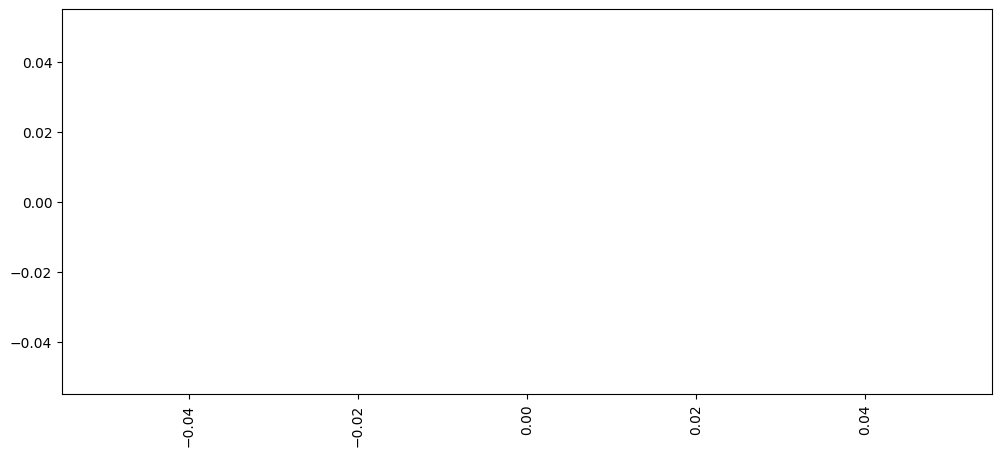

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 假設第一欄是 ids，剩下的是 one-hot labels
# merged_df = df2
label_cols = merged_df.columns[9:-2]  # 你可以調整這個 index，如果 label 欄位不是從第 1 欄開始
print(merged_df[label_cols].dtypes)

# === Step 2: 計算每個 label 的出現次數 ===
print(f"Selected label columns: {list(label_cols)}")
if len(label_cols) == 0:
    print("錯誤：選取到的標籤欄位數量為 0！請檢查 columns[9:-1] 的索引是否正確。")
    
label_counts = merged_df[label_cols].sum().sort_values(ascending=False)

# 顯示結果
print("每個 label 出現的次數：")
for index, value in label_counts.items():
    print(f"{index}: {value}")

# === Step 3: 視覺化 label 分布 ===
plt.figure(figsize=(12, 5))
label_counts.plot(kind='bar')
plt.title("Label Frequency Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# === Step 4: 每筆資料擁有幾個 label ===
merged_df['num_labels'] = merged_df[label_cols].sum(axis=1)

# 顯示基本統計
print(merged_df['num_labels'].describe())

# 視覺化
plt.figure(figsize=(8, 4))
merged_df['num_labels'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Labels per Sample")
plt.xlabel("Label Count")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

# === Step 5: Label Co-occurrence Matrix (可選) ===
co_occur = merged_df[label_cols].T.dot(merged_df[label_cols])
plt.figure(figsize=(10, 8))
sns.heatmap(co_occur, cmap='Blues', xticklabels=True, yticklabels=True)
plt.title("Label Co-occurrence Heatmap")
plt.tight_layout()
plt.show()


In [11]:
type(label_counts.sort_index())

pandas.core.series.Series

In [5]:
label_counts.sort_index().to_csv("data/label_counts_c_before.csv", header=["count"])
